In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob
from csv import reader

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/')
outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/'
images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Rhodhopsin/'
matplotlib.__version__

'3.3.3'

rerun on 2021-12-07 after correcting for salinity of media samples

In [2]:

!grep "rhodopsin" /mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv > All_GoM_RNA_seq_rhodopsin_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv
!grep "chlorophyll" /mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv > All_GoM_RNA_seq_bacteriochlorophyll_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv


In [3]:
O2=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/Weighted_average_O2_consumption_per_cell_per_genus.csv',
              index_col=0)
O2

,genus,Weighted_avg_O2_consumed_per_cell,date
0,AAA164-E04,0.002330,20171102
1,AAA536-G10,0.002330,20171102
2,AG-337-I02,0.002330,20171102
3,AG-414-E02,0.002330,20171102
4,AG-422-B15,0.002330,20171102
...,...,...,...
663,Verrucomicrobiales,0.001999,20190709
664,Vibrio,0.001999,20190709
665,Vicingaceae,0.001999,20190709
666,Winogradskyella,0.001999,20190709


In [4]:
head=['genus', 'prokka_function', 'prokka_gene', 'ec_number', 'transcripts_per_cell', 'date']
rhod=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_rhodopsin_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv',
                index_col=0, names=head)
rhod=rhod.merge(O2, on=['genus', 'date'], how='outer')
rhod=rhod.drop(['prokka_gene', 'ec_number'], axis='columns')
rhod=rhod.drop_duplicates()
rhod_melt=rhod.melt(id_vars=['genus', 'date', 'Weighted_avg_O2_consumed_per_cell','prokka_function'], value_name='transcripts_per_cell')
rhod_melt=rhod_melt.drop(['variable'], axis='columns')
rhod_melt
rhod
rhod_pivot=rhod.pivot(index=['genus', 'date','Weighted_avg_O2_consumed_per_cell'], columns='prokka_function', values='transcripts_per_cell')
#rhod_pivot=rhod_pivot.drop(['NaN'], axis='columns')
rhod_pivot=rhod_pivot[['Blue-light_absorbing_proteorhodopsin','Green-light_absorbing_proteorhodopsin']].copy()
#rhod_pivot=rhod_pivot.reset_index()
rhod_pivot=rhod_pivot.reset_index()
rhod_pivot['log10_Weighted_avg_O2_consumed_per_cell']=np.log10(rhod_pivot['Weighted_avg_O2_consumed_per_cell'])
rhod_pivot['log10_Blue-light_absorbing_proteorhodopsin_transcripts_per_cell']=np.log10(rhod_pivot['Blue-light_absorbing_proteorhodopsin'])
rhod_pivot['log10_Green-light_absorbing_proteorhodopsin_transcripts_per_cell']=np.log10(rhod_pivot['Green-light_absorbing_proteorhodopsin'])
rhod_pivot_no2017=rhod_pivot[rhod_pivot['date']!= 20171102]
rhod_pivot_no2017

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  import sys
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


prokka_function,genus,date,Weighted_avg_O2_consumed_per_cell,Blue-light_absorbing_proteorhodopsin,Green-light_absorbing_proteorhodopsin,log10_Weighted_avg_O2_consumed_per_cell,log10_Blue-light_absorbing_proteorhodopsin_transcripts_per_cell,log10_Green-light_absorbing_proteorhodopsin_transcripts_per_cell
1,AAA164-E04,20181030,0.002050,NaN,NaN,-2.688282,NaN,NaN
2,AAA164-E04,20190402,0.002101,NaN,NaN,-2.677645,NaN,NaN
3,AAA164-E04,20190709,0.001999,NaN,NaN,-2.699231,NaN,NaN
5,AAA536-G10,20181030,0.003056,NaN,0.339367,-2.514852,NaN,-0.469331
6,AAA536-G10,20190402,0.004028,NaN,1.697749,-2.394952,NaN,0.229873
...,...,...,...,...,...,...,...,...
662,Winogradskyella,20190402,0.002101,NaN,0.205159,-2.677645,NaN,-0.687909
663,Winogradskyella,20190709,0.001999,NaN,0.083524,-2.699231,NaN,-1.078187
665,Yoonia,20181030,0.002050,NaN,NaN,-2.688282,NaN,NaN
666,Yoonia,20190402,0.002101,NaN,NaN,-2.677645,NaN,NaN


### Look into doing a logit analysis on the two genes and the O2 consumption?


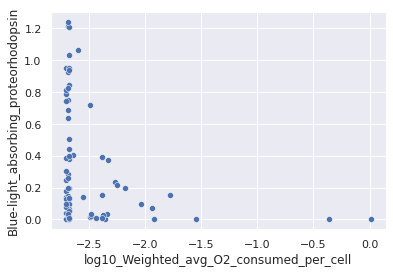

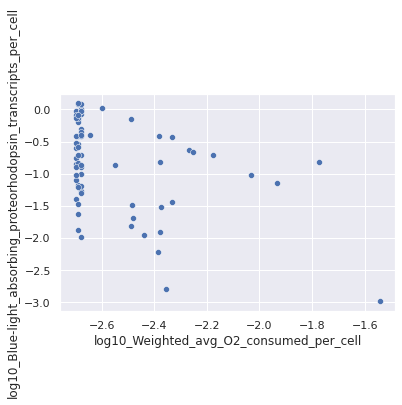

In [5]:
Blue=sns.scatterplot(data=rhod_pivot_no2017, x='log10_Weighted_avg_O2_consumed_per_cell', y='Blue-light_absorbing_proteorhodopsin')
plt.show()
blsave=Blue.get_figure()

Bluelog=sns.scatterplot(data=rhod_pivot_no2017, x='log10_Weighted_avg_O2_consumed_per_cell', y='log10_Blue-light_absorbing_proteorhodopsin_transcripts_per_cell')
blsave=Bluelog.get_figure()
blsave.savefig(images+'logO2_v_log10_blue_rhodhopsin_transcripts_per_cell.pdf')

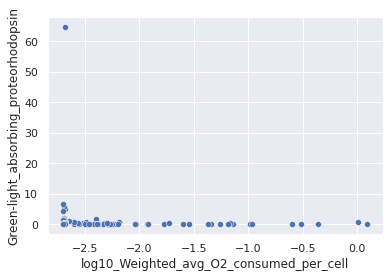

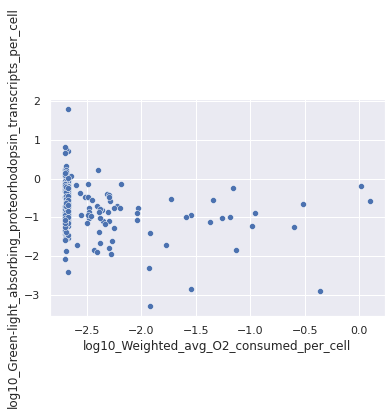

In [6]:
green=sns.scatterplot(data=rhod_pivot_no2017, x='log10_Weighted_avg_O2_consumed_per_cell', y='Green-light_absorbing_proteorhodopsin')
plt.show()
grsave=green.get_figure()

greenlog=sns.scatterplot(data=rhod_pivot_no2017, x='log10_Weighted_avg_O2_consumed_per_cell', y='log10_Green-light_absorbing_proteorhodopsin_transcripts_per_cell')
grsave=greenlog.get_figure()
grsave.savefig(images+'logO2_v_log10_green_rhodhopsin_transcripts_per_cell.pdf')

### Consider adding a version where i make the rhodopsin expression a % of total instead of the absolute transcripts

In [7]:
totalRNA=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv',
                index_col=0)
totalRNA

RNApercell=totalRNA.groupby(['genus', 'date'])['transcripts_per_cell'].sum()
RNApercell

genus            date    
AAA164-E04       20171102    807.560509
                 20181030    123.023330
                 20190402    191.608116
                 20190709    200.913807
AAA536-G10       20171102    268.407780
                                ...    
Winogradskyella  20190709     24.121830
Yoonia           20171102    222.500742
                 20181030     84.185621
                 20190402     45.146774
                 20190709     66.258503
Name: transcripts_per_cell, Length: 660, dtype: float64

In [8]:
relativeRNA=rhod_pivot_no2017.merge(RNApercell, how='left', on=['genus', 'date'])
relativeRNA['percent_green_rhodopsin_transcripts']=(relativeRNA['Green-light_absorbing_proteorhodopsin']/relativeRNA['transcripts_per_cell'])*100
relativeRNA['percent_blue_rhodopsin_transcripts']=(relativeRNA['Blue-light_absorbing_proteorhodopsin']/relativeRNA['transcripts_per_cell'])*100
relativeRNA['log10_percent_green_rhodopsin_transcripts']=np.log10(relativeRNA['percent_green_rhodopsin_transcripts'])
relativeRNA['log10_percent_blue_rhodopsin_transcripts']=np.log10(relativeRNA['percent_blue_rhodopsin_transcripts'])

relativeRNA.to_csv(outdir+ 'Rhodhopsin_expression_rates.csv')
relativeRNA

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,genus,date,Weighted_avg_O2_consumed_per_cell,Blue-light_absorbing_proteorhodopsin,Green-light_absorbing_proteorhodopsin,log10_Weighted_avg_O2_consumed_per_cell,log10_Blue-light_absorbing_proteorhodopsin_transcripts_per_cell,log10_Green-light_absorbing_proteorhodopsin_transcripts_per_cell,transcripts_per_cell,percent_green_rhodopsin_transcripts,percent_blue_rhodopsin_transcripts,log10_percent_green_rhodopsin_transcripts,log10_percent_blue_rhodopsin_transcripts
0,AAA164-E04,20181030,0.002050,NaN,NaN,-2.688282,NaN,NaN,123.023330,NaN,NaN,NaN,NaN
1,AAA164-E04,20190402,0.002101,NaN,NaN,-2.677645,NaN,NaN,191.608116,NaN,NaN,NaN,NaN
2,AAA164-E04,20190709,0.001999,NaN,NaN,-2.699231,NaN,NaN,200.913807,NaN,NaN,NaN,NaN
3,AAA536-G10,20181030,0.003056,NaN,0.339367,-2.514852,NaN,-0.469331,76.768780,0.442064,NaN,-0.354515,NaN
4,AAA536-G10,20190402,0.004028,NaN,1.697749,-2.394952,NaN,0.229873,130.086391,1.305093,NaN,0.115642,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Winogradskyella,20190402,0.002101,NaN,0.205159,-2.677645,NaN,-0.687909,23.788682,0.862423,NaN,-0.064280,NaN
497,Winogradskyella,20190709,0.001999,NaN,0.083524,-2.699231,NaN,-1.078187,24.121830,0.346260,NaN,-0.460597,NaN
498,Yoonia,20181030,0.002050,NaN,NaN,-2.688282,NaN,NaN,84.185621,NaN,NaN,NaN,NaN
499,Yoonia,20190402,0.002101,NaN,NaN,-2.677645,NaN,NaN,45.146774,NaN,NaN,NaN,NaN


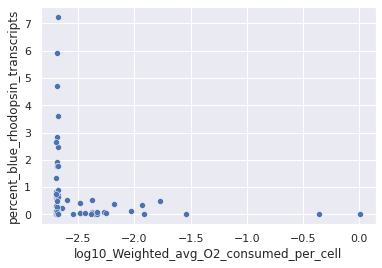

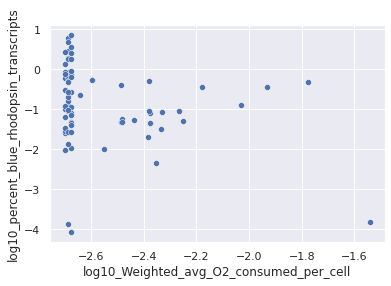

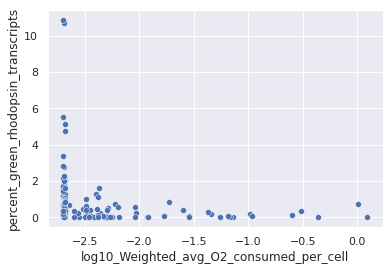

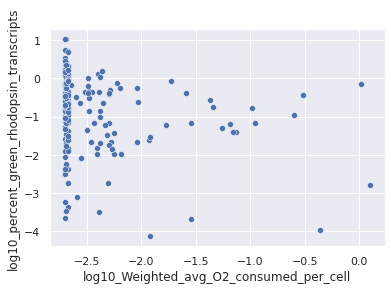

In [9]:

Blueperc=sns.scatterplot(data=relativeRNA, x='log10_Weighted_avg_O2_consumed_per_cell', y='percent_blue_rhodopsin_transcripts')
plt.show()
blsave=Blueperc.get_figure()
blsave.savefig(images+'logO2_v_%blue_rhodhopsin_transcripts_per_cell.pdf')

Blueperc=sns.scatterplot(data=relativeRNA, x='log10_Weighted_avg_O2_consumed_per_cell', y='log10_percent_blue_rhodopsin_transcripts')
plt.show()
blsave=Blueperc.get_figure()
blsave.savefig(images+'logO2_v_log10_%blue_rhodhopsin_transcripts_per_cell.pdf')


greenperc=sns.scatterplot(data=relativeRNA, x='log10_Weighted_avg_O2_consumed_per_cell', y='percent_green_rhodopsin_transcripts')
grsave=greenperc.get_figure()
plt.show()
grsave.savefig(images+'logO2_v_%green_rhodhopsin_transcripts_per_cell.pdf')

greenperc=sns.scatterplot(data=relativeRNA, x='log10_Weighted_avg_O2_consumed_per_cell', y='log10_percent_green_rhodopsin_transcripts')
grsave=greenperc.get_figure()
grsave.savefig(images+'logO2_v_log10_%green_rhodhopsin_transcripts_per_cell.pdf')

In [10]:
rates=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gRodon/genus_doubling_rates.csv',
                 index_col=0)
rates

,genus,Average_doubling_time,median_doubling_time
0,AAA164-E04,12.755643,12.456005
1,AAA536-G10,10.508890,10.541393
2,AG-337-I02,9.321011,9.504926
3,AG-339-G14,10.250614,10.250614
4,AG-414-E02,9.136331,9.136331
...,...,...,...
211,Unclassified,4.165118,3.478185
212,Verrucomicrobiales,2.124219,2.124219
213,Vicingaceae,4.464510,4.464510
214,Winogradskyella,4.283599,4.356637


In [11]:
relativeRNA=relativeRNA.merge(rates, on='genus', how='left')
relativeRNA['log10_weighted_avg_O2_consumed']=np.log10(relativeRNA['Weighted_avg_O2_consumed_per_cell'])
relativeRNA

,genus,date,Weighted_avg_O2_consumed_per_cell,Blue-light_absorbing_proteorhodopsin,Green-light_absorbing_proteorhodopsin,log10_Weighted_avg_O2_consumed_per_cell,log10_Blue-light_absorbing_proteorhodopsin_transcripts_per_cell,log10_Green-light_absorbing_proteorhodopsin_transcripts_per_cell,transcripts_per_cell,percent_green_rhodopsin_transcripts,percent_blue_rhodopsin_transcripts,log10_percent_green_rhodopsin_transcripts,log10_percent_blue_rhodopsin_transcripts,Average_doubling_time,median_doubling_time,log10_weighted_avg_O2_consumed
0,AAA164-E04,20181030,0.002050,NaN,NaN,-2.688282,NaN,NaN,123.023330,NaN,NaN,NaN,NaN,12.755643,12.456005,-2.688282
1,AAA164-E04,20190402,0.002101,NaN,NaN,-2.677645,NaN,NaN,191.608116,NaN,NaN,NaN,NaN,12.755643,12.456005,-2.677645
2,AAA164-E04,20190709,0.001999,NaN,NaN,-2.699231,NaN,NaN,200.913807,NaN,NaN,NaN,NaN,12.755643,12.456005,-2.699231
3,AAA536-G10,20181030,0.003056,NaN,0.339367,-2.514852,NaN,-0.469331,76.768780,0.442064,NaN,-0.354515,NaN,10.508890,10.541393,-2.514852
4,AAA536-G10,20190402,0.004028,NaN,1.697749,-2.394952,NaN,0.229873,130.086391,1.305093,NaN,0.115642,NaN,10.508890,10.541393,-2.394952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Winogradskyella,20190402,0.002101,NaN,0.205159,-2.677645,NaN,-0.687909,23.788682,0.862423,NaN,-0.064280,NaN,4.283599,4.356637,-2.677645
497,Winogradskyella,20190709,0.001999,NaN,0.083524,-2.699231,NaN,-1.078187,24.121830,0.346260,NaN,-0.460597,NaN,4.283599,4.356637,-2.699231
498,Yoonia,20181030,0.002050,NaN,NaN,-2.688282,NaN,NaN,84.185621,NaN,NaN,NaN,NaN,2.271783,1.606194,-2.688282
499,Yoonia,20190402,0.002101,NaN,NaN,-2.677645,NaN,NaN,45.146774,NaN,NaN,NaN,NaN,2.271783,1.606194,-2.677645


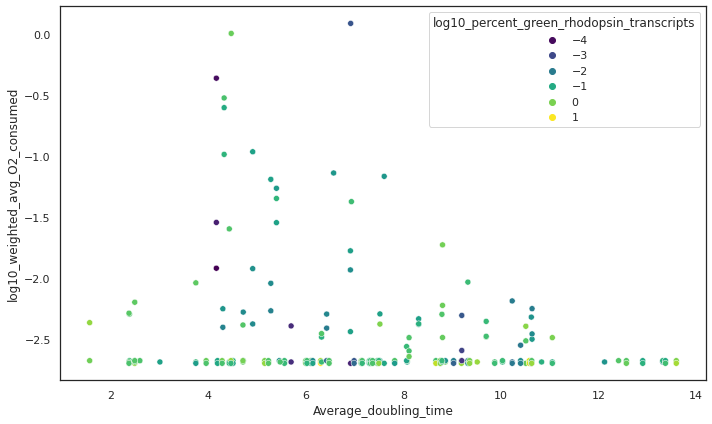

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

grtest=relativeRNA.dropna(subset=['log10_percent_green_rhodopsin_transcripts'])
grtest=grtest[grtest['percent_green_rhodopsin_transcripts'] >0.000 ]

plt.figure(figsize=(10,6))
sns.scatterplot(data=grtest, y='log10_weighted_avg_O2_consumed', x='Average_doubling_time', 
                    hue='log10_percent_green_rhodopsin_transcripts', palette='viridis')

plt.tight_layout()
plt.savefig(images+ "doubling_O2_green_rhodhopsin_transcript.pdf")

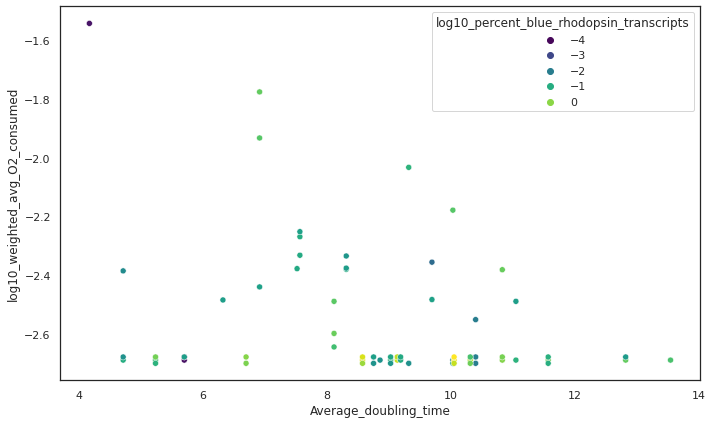

In [13]:
bltest=relativeRNA.dropna(subset=['log10_percent_blue_rhodopsin_transcripts'])
bltest=bltest[bltest['percent_blue_rhodopsin_transcripts'] >0.000 ]

plt.figure(figsize=(10,6))
sns.scatterplot(data=bltest, y='log10_weighted_avg_O2_consumed', x='Average_doubling_time', 
                    hue='log10_percent_blue_rhodopsin_transcripts', palette='viridis')

plt.tight_layout()
plt.savefig(images+ "doubling_O2_blue_rhodhopsin_transcript.pdf")

In [14]:
chl=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_bacteriochlorophyll_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv',
               index_col=0, names=head)
chl=chl.merge(O2, on=['genus', 'date'], how='left')
chl

,genus,prokka_function,prokka_gene,ec_number,transcripts_per_cell,date,Weighted_avg_O2_consumed_per_cell
0,Unclassified,Light-independent_protochlorophyllide_reductas...,bchL,1.3.7.7,0.000000,20171102,23.337911
1,Unclassified,Light-independent_protochlorophyllide_reductas...,bchB,1.3.7.7,0.000000,20171102,23.337911
2,Unclassified,Photosystem_I_P700_chlorophyll_a_apoprotein_A2,psaB,1.97.1.12,0.000000,20171102,23.337911
3,LFER01,Light-independent_protochlorophyllide_reductas...,bchL,1.3.7.7,0.008506,20171102,0.002330
4,LFER01,Light-independent_protochlorophyllide_reductas...,bchN,1.3.7.7,0.025519,20171102,0.002330
...,...,...,...,...,...,...,...
146,Octadecabacter,Light-independent_protochlorophyllide_reductas...,bchL,1.3.7.7,0.000000,20190709,0.001999
147,Ascidiaceihabitans,Light-independent_protochlorophyllide_reductas...,bchL,1.3.7.7,0.000000,20190709,0.001999
148,Ascidiaceihabitans,Light-independent_protochlorophyllide_reductas...,bchB,1.3.7.7,0.000000,20190709,0.001999
149,UBA4466,Photosystem_I_P700_chlorophyll_a_apoprotein_A2,psaB,1.97.1.12,0.056402,20190709,0.001999


In [15]:
### T-test rhodhopsin transcripts above and below O2 consumption thresholds

# arbitrary O2 values  0.0023115178181818178 0.0023690152954545453 0.002253796421052631

# Think about limiting to 10 SAG genera to try and reduce small number biases.

from scipy import stats
cols=['proteorhodopsin_transcripts_per_cell', 'Weighted_avg_O2_consumed_per_cell', 'genus', 'date']
data=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/rRNA/rRNA_O2_transcripts_stats_all_genera.csv', 
                 usecols=cols)
#data=data.iloc[: , 1:]
data=data[data['date'] != 20171102]

data=data.sort_values(by='proteorhodopsin_transcripts_per_cell')
data=data.dropna()
data

,genus,date,Weighted_avg_O2_consumed_per_cell,proteorhodopsin_transcripts_per_cell
394,SW10,20190402,0.002369,0.000000
233,MED-G85,20181030,0.002312,0.000000
89,Flavobacteriales,20181030,0.002312,0.000000
50,Arenitalea,20190402,0.002369,0.000000
53,Ascidiaceihabitans,20181030,0.002312,0.000000
...,...,...,...,...
59,BACL11,20190709,0.002254,4.543445
46,Arctic95D-9,20190402,0.002369,5.140108
57,BACL11,20181030,0.002312,5.710572
299,Opitutaceae,20190709,0.002254,6.568157
